In [1]:
import streamlit as st
import io
# from src import draft, demo

In [8]:
import streamlit as st
import bs4
from urllib.request import urlopen
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
from dateutil.relativedelta import relativedelta


def parsePrice():
    url = 'https://finance.yahoo.com/quote/0050.TW?p=0050.TW&.tsrc=fin-srch'
    page = urlopen(url)
    soup = bs4.BeautifulSoup(page, 'html.parser')
    price = soup.find(
        'div', {'class': 'My(6px) Pos(r) smartphone_Mt(6px)'}).find('span').text
    return price


def stock_price():
    symbol = '0050.TW'
    stock_obj = yf.Ticker(symbol)

    # st.write(f"## 分析 {stock_obj.info['longName']}")

    # price_text = st.write(f'### 目前成交價格為：**{parsePrice()}**')
    stock_df = stock_obj.history(
        start='2011-3-12', end='2021-3-12', auto_adjust=False)  # period="max"

    # st.line_chart(stock_df.Close)
    # st.line_chart(stock_df.Volume)

    stock_df.Close.plot.line()
    plt.show()
    stock_df.Volume.plot.line()
    plt.show()
    

    stock_daily_return = stock_df['Adj Close'].ffill().pct_change()
    start = stock_daily_return.index[0]
    end = stock_daily_return.index[-1]  # 以 stock 的最後一天為結束日期.

    year_difference = relativedelta(end, start).years + \
        (relativedelta(end, start).months)/12 + \
        (relativedelta(end, start).days)/365.2425

    init_balance = balance = 3000
    total_balance = stock_daily_return.copy()
    total_balance[0] = 0

    for i in range(len(stock_daily_return)):
        balance = balance * (1+total_balance[i])
        total_balance[i] = balance

    total_balance.rename('成長變化', inplace=True)

    # st.line_chart(total_balance)

    return_rate = (
        total_balance[-1] - total_balance[0])/total_balance[0]
    # st.write(
    #   f'如果當初投資 {init_balance} 元，現在會有 {total_balance[-1]} 元。經過約 {year_difference:.2f} 年的變化，投資報酬率為 {return_rate * 100:.2f}%。')

    # st.write('股票基本資料：')
    stock_info = si.get_quote_table(symbol)

    # st.write(stock_info)


def main():
#     st.write('# 成果 - 股票分析')
#     st.write('本頁面將使用 0050.TW（元大台灣 50）作為例子。')

    stock_price()
#     st.button('重新整理')


# if __name__ == '__main__':
#     main()

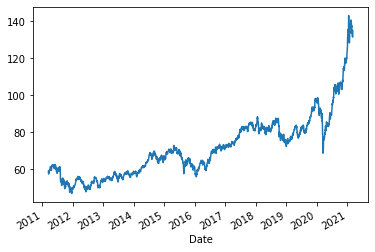

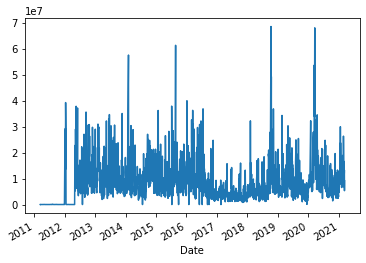

In [9]:
main()